# Python для анализа данных

## Библиотека pandas

<img src="https://mipt-stats.gitlab.io/images/m/pandas.gif" width="800"><br>


Pandas &mdash; пакет для статистической обработки данных, по функциональности близкий к SQL и R. Включает в себя функциональность работы с базами данных и таблицами Excel.

In [102]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import warnings
warnings.simplefilter("ignore", FutureWarning)

### 1. Тип данных `Series`

Одномерный набор данных. Отсутствующий данные записываются как `np.nan`. Например, в этот день термометр сломался или метеоролог был пьян. При вычислении среднего и других операций соответствующие функции не учитывают отсутствующие значения.

In [104]:
l = [1, 3, 5, np.nan, 6, 8]
s = pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

**Полезно знать:** Для поиска пропусков есть специальный метод `.isna()`. Он эквивалентен конструкции `s != s`

In [105]:
s.isna()

0    False
1    False
2    False
3     True
4    False
5    False
dtype: bool

Основная информация о наборе данных: количество записей, среднее, стандартное отклонение, минимум, нижний квартиль, медиана, верхний квартиль, максимум, а так же тип данных.

In [106]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

В данном примере обычная индексация.

In [10]:
s[2]

5.0

In [11]:
s[2] = 7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [12]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [13]:
s1 = s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [14]:
s2 = s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64

В сумме `s1+s2` складываются данные **с одинаковыми индексами**. Поскольку в `s1` нет данного и индексом 0, а в `s2` &mdash; с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [15]:
s1 + s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64

К наборам данных можно применять функции из `numpy`.

In [16]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных `s` мы не указали, что будет играть роль индекса. По умолчанию это последовательность неотрицательных целых чисел 0, 1, 2, ...

In [17]:
s.index

RangeIndex(start=0, stop=6, step=1)

Но можно создавать наборы данных с индексом, заданным списком.

In [18]:
i = list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [19]:
s = pd.Series(l, index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [20]:
s['c']

5.0

Если индекс &mdash; строка, то вместо `s['c']` можно писать `s.c`.

In [21]:
s.c

5.0

Набор данных можно создать из словаря.

In [22]:
s = pd.Series({'a':1, 'b':2, 'c':0})
s

a    1
b    2
c    0
dtype: int64

Можно отсортировать набор данных.

In [23]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат или времён измерения и т.д..

In [107]:
d = pd.date_range('20160101', periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [108]:
s = pd.Series(sps.norm.rvs(size=10), index=d)
s

2016-01-01    2.308746
2016-01-02   -0.055256
2016-01-03    1.225270
2016-01-04   -0.585962
2016-01-05   -0.717061
2016-01-06    1.558499
2016-01-07    0.344690
2016-01-08   -0.394343
2016-01-09   -0.690796
2016-01-10   -0.459734
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [109]:
s > 0

2016-01-01     True
2016-01-02    False
2016-01-03     True
2016-01-04    False
2016-01-05    False
2016-01-06     True
2016-01-07     True
2016-01-08    False
2016-01-09    False
2016-01-10    False
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть `True`.

In [110]:
s[s > 0]

2016-01-01    2.308746
2016-01-03    1.225270
2016-01-06    1.558499
2016-01-07    0.344690
dtype: float64

Кумулятивные максимумы &mdash; от первого элемента до текущего. Первое значение кумулятивного максимума совпадает с первым значением исходного массива. Далее значение $k$-го элемента есть максимум среди элементов до $k$-го включительно.

In [28]:
s.cummax()

2016-01-01   -0.582725
2016-01-02   -0.582725
2016-01-03   -0.315358
2016-01-04    0.649974
2016-01-05    0.649974
2016-01-06    0.649974
2016-01-07    0.840264
2016-01-08    0.840264
2016-01-09    0.840264
2016-01-10    1.653091
Freq: D, dtype: float64

In [87]:
s.to_csv("example.csv")

Кумулятивные суммы. Первое значение кумулятивной суммы совпадает с первым значением исходного массива. Далее значение $k$-го элемента есть сумма элементов до $k$-го включительно.

In [29]:
s.cumsum()

2016-01-01   -0.582725
2016-01-02   -1.327117
2016-01-03   -1.642475
2016-01-04   -0.992501
2016-01-05   -2.660520
2016-01-06   -3.160734
2016-01-07   -2.320470
2016-01-08   -3.402752
2016-01-09   -4.222987
2016-01-10   -2.569896
Freq: D, dtype: float64

Произвольные функции кумулятивным способом можно считать с помощью конструкции `expanding`. Например, так можно посчитать кумулятивные медианы. Будет не быстрее, чем вручную, но аккуратнее.

In [30]:
s.expanding().apply(np.median, raw=True)

2016-01-01   -0.582725
2016-01-02   -0.663559
2016-01-03   -0.582725
2016-01-04   -0.449041
2016-01-05   -0.582725
2016-01-06   -0.541470
2016-01-07   -0.500214
2016-01-08   -0.541470
2016-01-09   -0.582725
2016-01-10   -0.541470
Freq: D, dtype: float64

Если вы хотите посчитать разности соседних элементов, воспользуйтесь методом `diff`.  Ключевое слово `periods` отвечает за то, с каким шагом будут считаться разности.

In [31]:
s.diff()

2016-01-01         NaN
2016-01-02   -0.161667
2016-01-03    0.429034
2016-01-04    0.965332
2016-01-05   -2.317993
2016-01-06    1.167804
2016-01-07    1.340478
2016-01-08   -1.922546
2016-01-09    0.262048
2016-01-10    2.473325
Freq: D, dtype: float64

Результат будет иметь тот же размер, но в начале появятся пропущенные значения.  От них можно избавиться при помощи метода `dropna`.

In [32]:
s.diff().dropna()

2016-01-02   -0.161667
2016-01-03    0.429034
2016-01-04    0.965332
2016-01-05   -2.317993
2016-01-06    1.167804
2016-01-07    1.340478
2016-01-08   -1.922546
2016-01-09    0.262048
2016-01-10    2.473325
Freq: D, dtype: float64

**Упражнение**  
Посчитайте кумулятивное среднее квадратов разностей соседних элементов набора `s`.

In [33]:
# ВАШ КОД
s.diff().dropna().expanding().apply(lambda x: np.mean(x**2))

2016-01-02    0.026136
2016-01-03    0.105103
2016-01-04    0.380691
2016-01-05    1.628791
2016-01-06    1.575786
2016-01-07    1.612636
2016-01-08    1.910286
2016-01-09    1.680084
2016-01-10    2.173112
Freq: D, dtype: float64

Наконец, построим график.

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

# Нужно для новых версий библиотек для преобразования дат
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

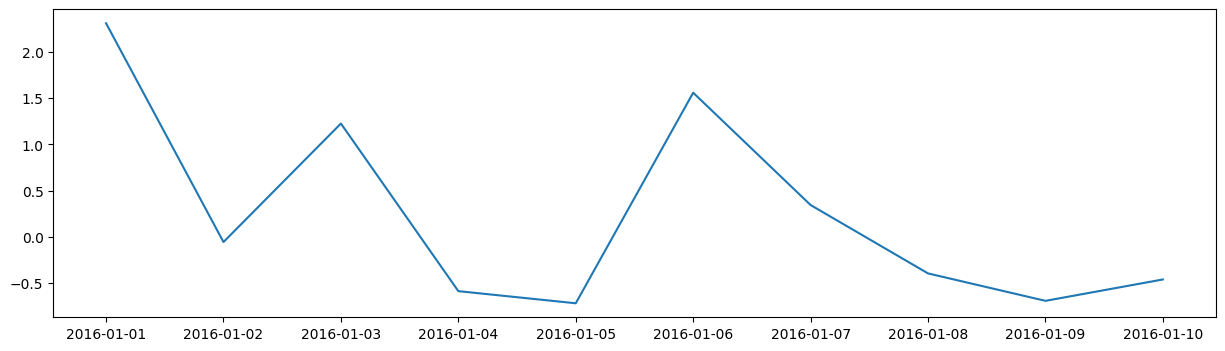

In [112]:
plt.figure(figsize=(15, 4))
plt.plot(s)
plt.show()

Более подробно ознакомиться с методами можно [в официальной документации](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). 

### 2. Тип данных `DataFrame`

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [113]:
d = {'one': pd.Series(range(6), index=list('abcdef')),
     'two': pd.Series(range(7), index=list('abcdefg')),
     'three': pd.Series(sps.norm.rvs(size=7), index=list('abcdefg'))}
df = pd.DataFrame(d)
df

,one,two,three
a,0.0,0,-0.440188
b,1.0,1,-1.291167
c,2.0,2,-1.174673
d,3.0,3,1.781558
e,4.0,4,0.465391
f,5.0,5,-0.164113
g,NaN,6,-0.223580


Таблица с несколькими разными типами данных

In [114]:
df2 = pd.DataFrame({ 'A': 1.,
                     'B': pd.Timestamp('20130102'),
                     'C': pd.Series(1, index=list(range(4)),
                                    dtype='float32'),
                     'D': np.array([3] * 4, 
                                   dtype='int32'),
                     'E': pd.Categorical(["test", "train",
                                          "test", "train"]),
                     'F': 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [115]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

#### 2.1 Данные

Вернемся к первой таблице и посмотрим на ее начало и конец

In [116]:
df.head()

,one,two,three
a,0.0,0,-0.440188
b,1.0,1,-1.291167
c,2.0,2,-1.174673
d,3.0,3,1.781558
e,4.0,4,0.465391


In [117]:
df.tail(3)

,one,two,three
e,4.0,4,0.465391
f,5.0,5,-0.164113
g,NaN,6,-0.223580


Индексы

In [118]:
df.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

Названия колонок

In [119]:
df.columns

Index(['one', 'two', 'three'], dtype='object')

Получение обычной матрицы данных

In [120]:
df.values

array([[ 0.        ,  0.        , -0.44018848],
       [ 1.        ,  1.        , -1.29116718],
       [ 2.        ,  2.        , -1.1746734 ],
       [ 3.        ,  3.        ,  1.78155781],
       [ 4.        ,  4.        ,  0.46539092],
       [ 5.        ,  5.        , -0.16411324],
       [        nan,  6.        , -0.2235798 ]])

Описательные статистики

In [121]:
df.describe()

,one,two,three
count,6.000000,7.000000,7.000000
mean,2.500000,3.000000,-0.149539
std,1.870829,2.160247,1.044961
min,0.000000,0.000000,-1.291167
25%,1.250000,1.500000,-0.807431
50%,2.500000,3.000000,-0.223580
75%,3.750000,4.500000,0.150639
max,5.000000,6.000000,1.781558


Транспонирование данных

In [47]:
df.T

,a,b,c,d,e,f,g
one,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,NaN
two,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
three,-0.501688,-1.823476,0.614354,0.396896,-0.365069,1.425844,0.515337


Сортировка по столбцу

In [48]:
df.sort_values(by='three', ascending=False)

,one,two,three
f,5.0,5,1.425844
c,2.0,2,0.614354
g,NaN,6,0.515337
d,3.0,3,0.396896
e,4.0,4,-0.365069
a,0.0,0,-0.501688
b,1.0,1,-1.823476


**Упражнение:** Сгенерируйте массив точек в 3D, создайте по нему датафрейм и отсортируйте строки лексикографически.

In [49]:
# ВАШ КОД
pd.DataFrame(
    sps.norm.rvs(size=(100, 3)),
    columns=['x', 'y', 'z']
).sort_values(by=['x', 'y', 'z'])

,x,y,z
25,-2.676486,-0.523258,-0.957966
32,-2.279277,1.121217,1.021722
99,-2.102591,-0.104184,0.712286
82,-1.927232,-0.732860,0.151129
6,-1.705585,-0.920770,-0.163511
...,...,...,...
86,1.544559,-0.039644,1.299197
1,1.571990,-0.412932,-0.253941
75,1.631679,-2.040785,0.223376
73,2.025405,0.231248,0.642372


#### 2.2 Индексация

В отличии от обычной системы индексации в Python и Numpy, в Pandas принята иная система индексации, которая является несколько нелогичной, однако, на практике часто оказывается удобной при обработке сильно неоднородных данных.
Для написания продуктивного кода при обработке большого объема данных стоит использовать атрибуты `.at`, `.iat`, `.loc`, `.iloc`, `.ix`.

Если в качестве индекса указать имя столбца, получится одномерный набор данных типа `Series`.

In [122]:
df['one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

К столбцу можно обращаться как к полю объекта, если имя столбца позволяет это сделать.

In [123]:
df.one

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Индексы полученного одномерного набора данных.

In [52]:
df['one'].index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g'], dtype='object')

У данного столбца есть имя, его можно получить следующим образом.

In [53]:
df['one'].name

'one'

Получение элемента массива

In [54]:
df['one']['c']

2.0

Правила индексации в pandas несколько отличаются от общепринятых. Если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [55]:
df['b':'d']

,one,two,three
b,1.0,1,-1.823476
c,2.0,2,0.614354
d,3.0,3,0.396896


Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным, хотя и удобно на практике.

In [56]:
df[1:3]

,one,two,three
b,1.0,1,-1.823476
c,2.0,2,0.614354


Логичнее работает атрибут `loc`: первая позиция &mdash; всегда индекс строки, а вторая &mdash; столбца.

In [57]:
df.loc['b']

one      1.000000
two      1.000000
three   -1.823476
Name: b, dtype: float64

In [58]:
df.loc['b', 'one']

1.0

In [59]:
df.loc['a':'b', 'one']

a    0.0
b    1.0
Name: one, dtype: float64

In [60]:
df.loc['a':'b', :]

,one,two,three
a,0.0,0,-0.501688
b,1.0,1,-1.823476


In [61]:
df.loc[:, 'one']

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    NaN
Name: one, dtype: float64

Атрибут `iloc` подобен `loc`: первый индекс &mdash; номер строки, второй &mdash; номер столбца. Это целые числа, конец диапазона не включается как обычно в питоне.

In [62]:
df.iloc[2]

one      2.000000
two      2.000000
three    0.614354
Name: c, dtype: float64

In [63]:
df.iloc[1:3]

,one,two,three
b,1.0,1,-1.823476
c,2.0,2,0.614354


In [64]:
df.iloc[1:3, 0:2]

,one,two
b,1.0,1
c,2.0,2


Булевская индексация &mdash; выбор строк с заданным условием

In [65]:
df[df.three > 0]

,one,two,three
c,2.0,2,0.614354
d,3.0,3,0.396896
f,5.0,5,1.425844
g,NaN,6,0.515337


**Упражнение**  
Сгенерируйте случайную целочисленную матрицу $n \times m$, где $n=20, m=10$. Создайте из неё датафрейм, пронумеровав столбцы случайной перестановкой чисел из $\{1, \ldots, m\}$. Выберите столбцы с чётными номерами и строки, в которых чётных элементов больше, чем нечётных.  

In [66]:
# ВАШ КОД

# создаем матрицу
n, m = 20, 10
data = sps.randint(low=-100, high=100).rvs(size=(n, m))
cols = np.arange(1, m + 1)
np.random.shuffle(cols)

# создаем таблицу
task_df = pd.DataFrame(data, columns=cols)

# задаем условия для строк и столбцов
col_mask = (cols % 2) == 0
row_mask = np.sum(data % 2, axis=1) < (m / 2)

# извлекаем данные по условию
task_df.loc[row_mask, col_mask]

,2,6,4,10,8
7,-47,6,90,-46,-95
9,-19,-46,35,-97,-3
11,-48,-98,-88,-41,74
14,76,86,-21,22,-98


#### 2.3 Изменение таблиц

К таблице можно добавлять новые столбцы.

In [67]:
df['4th'] = df['one'] * df['two']
df['flag'] = df['two'] > 2
df

,one,two,three,4th,flag
a,0.0,0,-0.501688,0.0,False
b,1.0,1,-1.823476,1.0,False
c,2.0,2,0.614354,4.0,False
d,3.0,3,0.396896,9.0,True
e,4.0,4,-0.365069,16.0,True
f,5.0,5,1.425844,25.0,True
g,NaN,6,0.515337,NaN,True


И удалять имеющиеся.

In [68]:
del df['two']
df['foo'] = 0
df

,one,three,4th,flag,foo
a,0.0,-0.501688,0.0,False,0
b,1.0,-1.823476,1.0,False,0
c,2.0,0.614354,4.0,False,0
d,3.0,0.396896,9.0,True,0
e,4.0,-0.365069,16.0,True,0
f,5.0,1.425844,25.0,True,0
g,NaN,0.515337,NaN,True,0


Изменение элемента

In [69]:
df.iat[1, 0] = -1

# Эквивалентные формы:
# df['one']['b'] = -1  <--  SettingWithCopyWarning
# df.at['b', 'one'] = -1

df

,one,three,4th,flag,foo
a,0.0,-0.501688,0.0,False,0
b,-1.0,-1.823476,1.0,False,0
c,2.0,0.614354,4.0,False,0
d,3.0,0.396896,9.0,True,0
e,4.0,-0.365069,16.0,True,0
f,5.0,1.425844,25.0,True,0
g,NaN,0.515337,NaN,True,0


Добавим копию столбца `one`, в которую входят только строки до третьей.

In [70]:
df['one_tr'] = df['one'][:3]
df

,one,three,4th,flag,foo,one_tr
a,0.0,-0.501688,0.0,False,0,0.0
b,-1.0,-1.823476,1.0,False,0,-1.0
c,2.0,0.614354,4.0,False,0,2.0
d,3.0,0.396896,9.0,True,0,NaN
e,4.0,-0.365069,16.0,True,0,NaN
f,5.0,1.425844,25.0,True,0,NaN
g,NaN,0.515337,NaN,True,0,NaN


#### 2.4 Пропуски

Удаление всех строк с пропусками

In [71]:
df.dropna(how='any')

,one,three,4th,flag,foo,one_tr
a,0.0,-0.501688,0.0,False,0,0.0
b,-1.0,-1.823476,1.0,False,0,-1.0
c,2.0,0.614354,4.0,False,0,2.0


Замена всех пропусков на значение

In [72]:
df.fillna(value=666)

,one,three,4th,flag,foo,one_tr
a,0.0,-0.501688,0.0,False,0,0.0
b,-1.0,-1.823476,1.0,False,0,-1.0
c,2.0,0.614354,4.0,False,0,2.0
d,3.0,0.396896,9.0,True,0,666.0
e,4.0,-0.365069,16.0,True,0,666.0
f,5.0,1.425844,25.0,True,0,666.0
g,666.0,0.515337,666.0,True,0,666.0


Замена всех пропусков на среднее по столбцу

In [73]:
df.fillna(value=df.mean())

,one,three,4th,flag,foo,one_tr
a,0.000000,-0.501688,0.000000,False,0,0.000000
b,-1.000000,-1.823476,1.000000,False,0,-1.000000
c,2.000000,0.614354,4.000000,False,0,2.000000
d,3.000000,0.396896,9.000000,True,0,0.333333
e,4.000000,-0.365069,16.000000,True,0,0.333333
f,5.000000,1.425844,25.000000,True,0,0.333333
g,2.166667,0.515337,9.166667,True,0,0.333333


Булевская маска пропущенных значений

In [74]:
df.isnull()

,one,three,4th,flag,foo,one_tr
a,False,False,False,False,False,False
b,False,False,False,False,False,False
c,False,False,False,False,False,False
d,False,False,False,False,False,True
e,False,False,False,False,False,True
f,False,False,False,False,False,True
g,True,False,True,False,False,True


#### 2.5 Простые операции

Создадим таблицу из массива случайных чисел.

In [75]:
df1 = pd.DataFrame(sps.uniform.rvs(size=(10, 4)),
                   columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
0,0.341666,0.018355,0.782811,0.924806
1,0.177442,0.974276,0.400417,0.892161
2,0.231776,0.159639,0.795035,0.277273
3,0.979784,0.141228,0.420813,0.520061
4,0.419552,0.445684,0.075176,0.348593
5,0.607960,0.231607,0.952760,0.605749
6,0.231098,0.173988,0.666134,0.246854
7,0.308597,0.599512,0.203508,0.463112
8,0.134325,0.885838,0.381955,0.326651
9,0.079936,0.851729,0.831549,0.479307


In [76]:
df2 = pd.DataFrame(sps.uniform.rvs(size=(7, 3)),
                   columns=['A', 'B', 'C'])
df2

,A,B,C
0,0.303418,0.972836,0.523638
1,0.996322,0.884780,0.068490
2,0.288211,0.330816,0.752445
3,0.959758,0.051369,0.739808
4,0.672927,0.085893,0.020056
5,0.204373,0.467270,0.382685
6,0.374159,0.199989,0.213978


In [77]:
df1 + df2

,A,B,C,D
0,0.645084,0.991191,1.306449,NaN
1,1.173765,1.859056,0.468907,NaN
2,0.519987,0.490455,1.547480,NaN
3,1.939542,0.192596,1.160621,NaN
4,1.092479,0.531577,0.095231,NaN
5,0.812333,0.698877,1.335445,NaN
6,0.605257,0.373978,0.880112,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [78]:
2 * df1 + 3

,A,B,C,D
0,3.683332,3.036710,4.565622,4.849612
1,3.354884,4.948551,3.800834,4.784322
2,3.463551,3.319277,4.590071,3.554546
3,4.959567,3.282455,3.841625,4.040123
4,3.839104,3.891369,3.150351,3.697187
5,4.215919,3.463214,4.905520,4.211499
6,3.462196,3.347977,4.332267,3.493708
7,3.617193,4.199025,3.407016,3.926224
8,3.268651,4.771676,3.763909,3.653301
9,3.159871,4.703458,4.663097,3.958615


In [79]:
np.sin(df1)

,A,B,C,D
0,0.335057,0.018354,0.705275,0.798504
1,0.176512,0.827295,0.389802,0.778430
2,0.229706,0.158961,0.713888,0.273734
3,0.830377,0.140759,0.408502,0.496933
4,0.407351,0.431075,0.075105,0.341576
5,0.571194,0.229542,0.815018,0.569378
6,0.229047,0.173112,0.617951,0.244355
7,0.303722,0.564240,0.202106,0.446735
8,0.133922,0.774445,0.372735,0.320873
9,0.079851,0.752420,0.738976,0.461165


Построим графики кумулятивных сумм

In [80]:
cs = df1.cumsum()
cs

,A,B,C,D
0,0.341666,0.018355,0.782811,0.924806
1,0.519108,0.992631,1.183228,1.816967
2,0.750884,1.152269,1.978263,2.094240
3,1.730667,1.293497,2.399076,2.614302
4,2.150220,1.739181,2.474252,2.962895
5,2.758179,1.970788,3.427011,3.568644
6,2.989277,2.144776,4.093145,3.815498
7,3.297874,2.744289,4.296653,4.278611
8,3.432199,3.630127,4.678608,4.605261
9,3.512135,4.481856,5.510156,5.084569


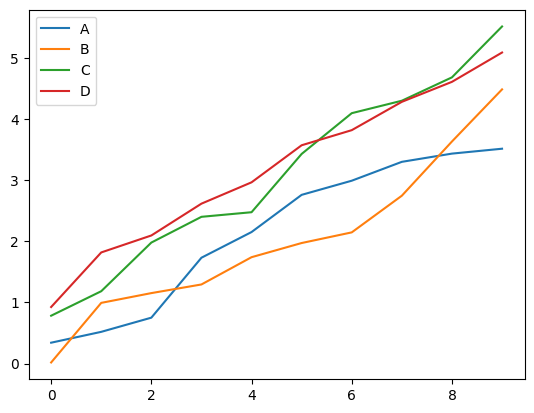

In [81]:
cs.plot()
plt.show()

**Упражнение**   
Сгенерируйте случайную выборку $X_1, \ldots, X_n$ для $n = 100$ из стандартного нормального распределения, соберите из неё `pd.DataFrame`, замените случайные 10% элементов на пропуски (`np.nan`), а затем добавьте по столбцу для оценок первых 4 моментов кумулятивно — $$\frac{1}{m} \sum\limits_{i=1}^{m} X_i^{k}, \; i \in \overline{1, m}, \; m \in  \overline{1, n}, \; k \in \overline{1, 4}$$ 
Ваша функция должна корректно обрабатывать пропуски. В конце постройте график.

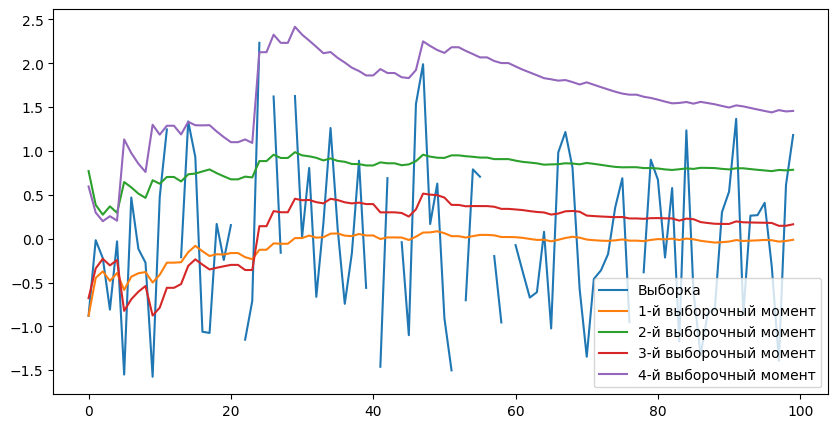

In [82]:
# YOUR CODE

# генерируем выборку
n = 100
sample = sps.norm.rvs(size=n)

# создаем пропуски
index = np.random.choice(np.arange(n), int(0.1 * n), replace=True)
sample[index] = np.nan

# заводим dataframe
sample_df = pd.DataFrame(sample, columns=['Выборка'])


for k in range(1, 5):
    sample_df['{}-й выборочный момент'.format(k)] = (
        sample_df['Выборка'] ** k
    ).expanding().apply(np.nanmean)
    
sample_df.plot(figsize=(10, 5));

### 3. Чтение и запись данных

**Загрузка текстовых файлов табличного вида** производится с помощью функции `pd.read_csv`. Основные аргументы следующие:
* `filepath_or_buffer` &mdash; пусть к файлу;
* `sep` &mdash; разделитель колонок в строке (запятая, табуляция и т.д.);
* `header` &mdash; номер строки или список номеров строк, используемых в качестве имен колонок;
* `names` &mdash; список имен, которые будут использованы в качестве имен колонок;
* `index_col` &mdash; колонка, используемая в качестве индекса;
* `usecols` &mdash; список имен колонок, которые будут загружены;
* `nrows` &mdash; сколько строк прочитать;
* `skiprows` &mdash; номера строк с начала, которые нужно пропустить;
* `skipfooter` &mdash; сколько строк в конце пропустить;
* `na_values` &mdash; список значений, которые распознавать как пропуски;
* `parse_dates` &mdash; распознавать ли даты, можно передать номера строк;
* `date_parser` &mdash; парсер дат;
* `dayfirst` &mdash; день записывается перед месяцем или после;
* `thousands` &mdash; разделитель тысяч;
* `decimal` &mdash; разделитель целой и дробной частей;
* `comment` &mdash; символ начала комментария.

Полный список параметров:

`pd.read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)`

**Загрузка таблиц формата Excel** производится с помощью функции `pd.read_excel`. Основные аргументы следующие:
* `io` &mdash; пусть к файлу;
* `sheetname` &mdash; какие листы таблицы загрузить;
* Остальные параметры аналогично.

`pd.read_excel(io, sheetname=0, header=0, skiprows=None, skip_footer=0, index_col=None, names=None, parse_cols=None, parse_dates=False, date_parser=None, na_values=None, thousands=None, convert_float=True, has_index_names=None, converters=None, dtype=None, true_values=None, false_values=None, engine=None, squeeze=False, **kwds)`

**Запись таблицы в текстовый файл** производится с помощью функции `df.to_csv`. Основные аргументы следующие:
* `df` &mdash; DataFrame, который нужно записать;
* `path_or_buf` &mdash; путь, куда записать;
* `sep` &mdash; разделитель колонок в строке (запятая, табуляция и т.д.);
* `na_rep` &mdash; как записать пропуски;
* `float_format` &mdash; формат записи дробных чисел;
* `columns` &mdash; какие колонки записать;
* `header` &mdash; как назвать колонки при записи;
* `index` &mdash; записывать ли индексы в файл;
* `index_label` &mdash; имена индексов, которые записать в файл.

Полный список параметров:

`df.to_csv(path_or_buf=None, sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression=None, quoting=None, quotechar='"', line_terminator='\n', chunksize=None, tupleize_cols=False, date_format=None, doublequote=True, escapechar=None, decimal='.')`

**Запись таблицы в формат Excel** производится с помощью функции `df.to_excel`. Основные аргументы аналогичные. Полный список параметров:

`df.to_excel(excel_writer, sheet_name='Sheet1', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, startrow=0, startcol=0, engine=None, merge_cells=True, encoding=None, inf_rep='inf', verbose=True, freeze_panes=None)`

### 4. Примеры чтения данных и работы с датами

Прочитаем файл, который содержит два столбца &mdash; дата и число. Столбцы разделяются табуляцией.

In [124]:
df = pd.read_csv('./titanic.csv', parse_dates=[0])
df.head()

C:\Users\Dari\AppData\Local\Temp\ipykernel_8052\3944795250.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('./titanic.csv', parse_dates=[0])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


В информации о таблице видим, что дата определилась, т.к. формат колонки `Time` обозначен как `datetime64[ns]`.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


### 5. Интервалы времени

Интервал времени задается объектом `pd.Timedelta`

Возможные обозначения интервалов: `'Y', 'M', 'W', 'D', 'days', 'day', 'hours', hour', 'hr', 'h', 'm', 'minute', 'min', 'minutes', 'T', 'S', 'seconds', 'sec', 'second', 'ms', 'milliseconds', 'millisecond', 'milli', 'millis', 'L', 'us', 'microseconds', 'microsecond', 'micro', 'micros', 'U', 'ns', 'nanoseconds', 'nano', 'nanos', 'nanosecond', 'N'`

Например, интервал времени в 5 недель 6 дней 5 часов 37 минут 23 секунды 12 милисекунд:

In [85]:
pd.Timedelta('5W 6 days 5hr 37min 23sec 12ms')

Timedelta('41 days 05:37:23.012000')

Поробуем понять что такое `Y` и `M`.

In [86]:
pd.Timedelta('1Y'), pd.Timedelta('1M')

(Timedelta('365 days 05:49:12'), Timedelta('0 days 00:01:00'))

Символ `Y` обозначает год. Он сделан таким из-за високосных годов. Поскольку месяцы разной длины, то их вообще нельзя здесь задать. Поэтому `M` обозначает минуты.

Интервал можно добавить к какой-нибудь дате, или вычесть из нее.

In [87]:
pd.to_datetime('2019.09.18 18:30') \
    + pd.Timedelta('8hr 37min 23sec 12ms')

Timestamp('2019-09-19 03:07:23.012000')

In [88]:
pd.to_datetime('2019.09.18 18:30') \
    - pd.Timedelta('20hr 50min 23sec 12ms')

Timestamp('2019-09-17 21:39:36.988000')

Сделать регулярный список дат позволяет функция `pd.timedelta_range`, которая реализует функционал `range` для дат. Ей нужно передать **ровно три аргумента** из следующих четырех:
* `start` &mdash; интервал начала отчета;
* `end` &mdash; интервал окончания отчета;
* `periods` &mdash; количество интервалов;
* `freq` &mdash; частота отсчета.

**Пример** 
<img src="https://mipt-stats.gitlab.io/images/m/temperature.jpg" width="140" align="right">  
Врач на протяжении дня измеряет пациенту температуру каждые 3 часа в течение 2 недель. Также пациенту необходимо спать с 11 вечера до 7 утра. Каждый день измерения температуры начинаются в 8 часов. Первое измерение 22 марта 2020 года. Определите моменты времени, когда нужно измерить пациенту температуру.

In [89]:
# Периоды измерения температуры днем
periods = pd.timedelta_range(start='8H', freq='3H', end='23H')
periods

TimedeltaIndex(['08:00:00', '11:00:00', '14:00:00', '17:00:00', '20:00:00',
                '23:00:00'],
               dtype='timedelta64[ns]', freq='3H')

In [90]:
# Даты измерний температуры
dates = pd.to_datetime('2020.03.22') \
    + pd.timedelta_range(start=0, freq='1D', end='2W')
dates

DatetimeIndex(['2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05'],
              dtype='datetime64[ns]', freq='D')

In [91]:
# Время измерния температуры
n, m = len(dates), len(periods)
dates_new = dates.repeat(m)
periods_new = pd.to_timedelta(np.tile(periods, n))
time = dates_new + periods_new
time

DatetimeIndex(['2020-03-22 08:00:00', '2020-03-22 11:00:00',
               '2020-03-22 14:00:00', '2020-03-22 17:00:00',
               '2020-03-22 20:00:00', '2020-03-22 23:00:00',
               '2020-03-23 08:00:00', '2020-03-23 11:00:00',
               '2020-03-23 14:00:00', '2020-03-23 17:00:00',
               '2020-03-23 20:00:00', '2020-03-23 23:00:00',
               '2020-03-24 08:00:00', '2020-03-24 11:00:00',
               '2020-03-24 14:00:00', '2020-03-24 17:00:00',
               '2020-03-24 20:00:00', '2020-03-24 23:00:00',
               '2020-03-25 08:00:00', '2020-03-25 11:00:00',
               '2020-03-25 14:00:00', '2020-03-25 17:00:00',
               '2020-03-25 20:00:00', '2020-03-25 23:00:00',
               '2020-03-26 08:00:00', '2020-03-26 11:00:00',
               '2020-03-26 14:00:00', '2020-03-26 17:00:00',
               '2020-03-26 20:00:00', '2020-03-26 23:00:00',
               '2020-03-27 08:00:00', '2020-03-27 11:00:00',
               '2020-03-

---

При подготовке использованы материалы https://inp.nsk.su/~grozin/python/ и http://pandas.pydata.org/pandas-docs/stable/10min.html